<DIV ALIGN=CENTER>

# Introduction to Machine Learning Pre-Processing
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore data pre-processing. This is a
large topic, so in this notebook we will focus on some basic concepts.
You should feel free to try completing additional tasks.

-----



In [2]:
%matplotlib inline

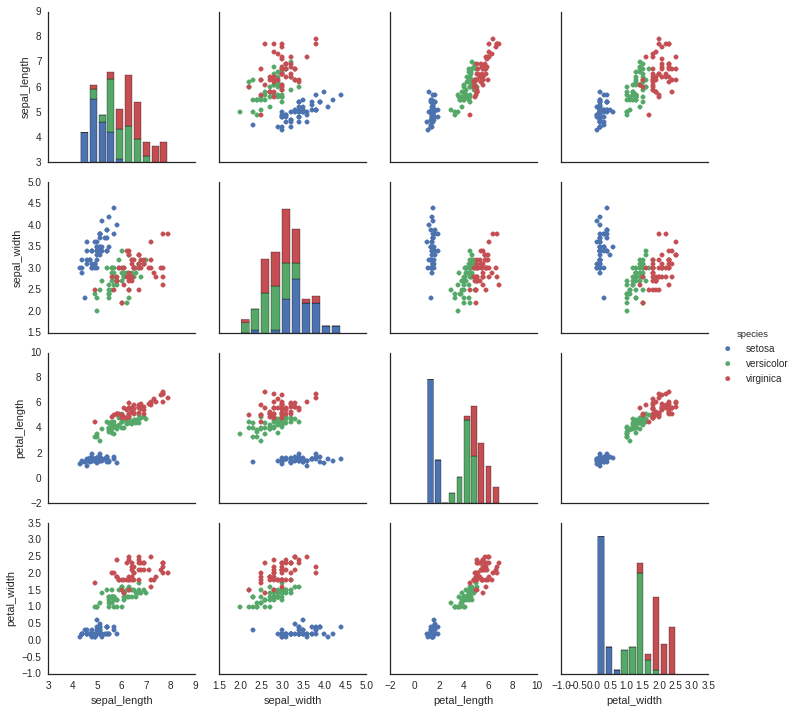

In [3]:
# Set up Notebook

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Load the Iris Data
iris = sns.load_dataset("iris")

# Make pair plot
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Lets explicitly set the axes limits
axes = g.axes

lim = [(3, 9), (1.5, 5), (-2, 10), (-1, 3.5)]

for i in range(len(lim)):
    for j in range(len(lim)):
        axes[i, j].set_xlim(lim[j])
        axes[i, j].set_ylim(lim[i])

-----

## Iris Data

As the previous figure illustrates, the three types of Iris cluster
naturally in these dimensions, with minimal overlap. As a result, these
data provide an excellent test for different machine learning
algorithms.  The four primary dimensions of the data include Sepal
Length, Sepal Width, Petal Length, and Petal Width, which can be seen
from the following Iris picture (or type _virginica_).

![Iris picture from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

The data set consists of 150 total measurements of three different types
of Iris flowers, equally divided between three classes: Iris Setosa,
Iris versicolor, and Iris virginica. Before proceeding, we can examine
the Pandas DataFrame that contains these data.

-----

In [4]:
# Exmaine the first few rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Examine grouped data
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


-----

As demonstrated by the output from the previous code cells, our test
data  match our expectations (the full Iris data set is listed on
Wikipedia). We have three types, each with fifty entries, and every row
has four measured attributes. Before starting to apply machine learning
techniques to these data, however, we first define the following two
convenience plotting functions:

1. Confusion Matrix: this method generates a confusion matrix that
compares predicted to true values for a given data set. In our simple
example, this functions produces a 3 x 3 [heatmap][hm] since we only have
three types in our data.

2. Scatter Plot: this method display a formatted [scatter plot][sp] with each
type individually colored. This is useful for viewing the distribution
of types in a particular pair of dimensions (as shown in the original
Iris figure.

Following these function definitions, we demonstrate the scatter plot
method by producing a large version of the _Sepal Width_ versus _Petal
Width_ scatter plot.

-----

[hm]: https://en.wikipedia.org/wiki/Heat_map
[sp]: https://en.wikipedia.org/wiki/Scatter_plot

In [6]:
# Convenience function to plot confusion matrix

import numpy as np
import pandas as pd

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):
    # Define names for the three Iris types
    names = ['setosa', 'versicolor', 'virginica']

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=3)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=names, columns=names )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

# This method produces a colored scatter plot that displays the intrisic
# clustering of a particular data set. The different types are colored
# uniquely.

def splot_data(col1, col2, data, hue_col, label1, label2, xls, yls, sz=8):
    
    # Make the  scatter plot on the DataFrame
    jp = sns.lmplot(col1, col2, data,
                    fit_reg=False, hue=hue_col, size=sz, scatter_kws ={'s': 60})
    
    # Decorate the plot and set limits
    jp.set_axis_labels(label1, label2)

    jp.axes[0,0].set_xlim(xls)
    jp.axes[0,0].set_ylim(yls)

    sns.despine(offset=0, trim=True)
    sns.set(style="ticks", font_scale=2.0)

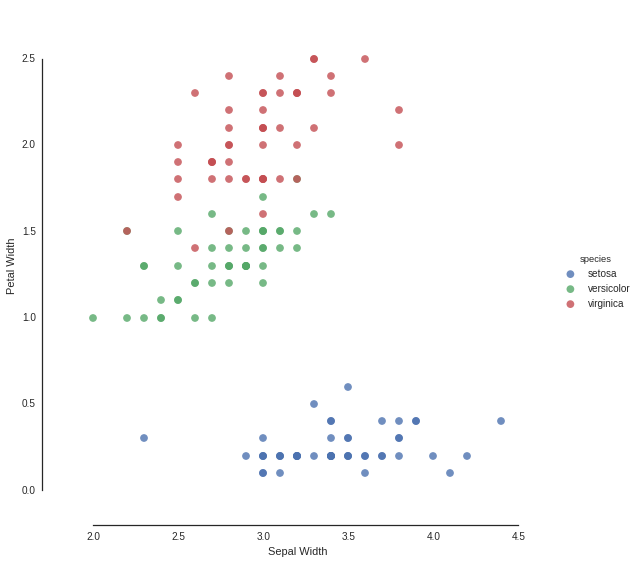

In [7]:
# Demonstration of our scatter plot method

splot_data('sepal_width', 'petal_width', iris, 'species', 
           'Sepal Width', 'Petal Width', (1.7, 4.7), (-0.2, 2.8))

-----

As the above plot clearly shows, the _setosa_ type is already separated
in these two dimensions, and the other two types: versicolor and
virginica, are nearly separated. This will simplify the task of running
and evaluating the machine learning algorithms in the rest of this
Notebook. However, this will not be the case with real data.

Our next step is to build explicit data and label NumPy arrays. We do
this primarily because scikit-learn does not work natively with Pandas
DataFrames. We can easily grab the underlying NumPy two-dimensional
array from a DataFrame by using the `values` attribute, in this case we
first select out the four attribute columns. Next, we create a numerical
array for the data types, where 0, 1, and 2 are mapped distinctly into
setosa, versicolor, and virginica.

-----

In [8]:
# Now lets get the data and labels

data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])

-----

Our final step before exploring specific machine learning algorithms is
to create training and testing data sets. We can do this by using the
`train_test_split` method in the `cross_validation` module. The only
tuning parameter at this point is the `test_size` parameter, which we
have set to 40% of our data is reserved for testing. We can change this
and study how the different algorithms perform with more or less
training data.

-----